<a href="https://colab.research.google.com/github/jayanth27shiva/capstone2025-jeyadevaswamy-Auditing-and-Assessing-Wireless-Networks-using-ML-Techniques/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pandas scikit-learn tensorflow keras numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
import tensorflow
import keras

In [ ]:
print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(plt.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("Tensorflow : {0}".format(tensorflow.__version__))
print("Keras : {0}".format(keras.__version__))

pandas : 2.2.2
numpy : 2.0.2
matplotlib : 3.10.0
sklearn : 1.6.1
Tensorflow : 2.19.0
Keras : 3.10.0


In [ ]:
import zipfile
import os
# import pyshark

zip_path = "/content/archive.zip"
extract_path = "/content/extracted_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

extracted_files = os.listdir(extract_path)
extracted_files

['KDDTrain+_20Percent.txt',
 'index.html',
 'KDDTest-21.arff',
 'KDDTrain+.arff',
 'KDDTest+.arff',
 'nsl-kdd',
 'KDDTrain1.jpg',
 'KDDTrain+.txt',
 'KDDTest+.txt',
 'KDDTest-21.txt',
 'KDDTest1.jpg',
 'KDDTrain+_20Percent.arff']

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_type","difficulty_level"]

train_path = pd.read_csv('/content/extracted_dataset/KDDTrain+.txt')
# test_path = pd.read_csv('/content/extracted_dataset/KDDTest+.txt')

train_path.columns = col_names
# test_path.columns = col_names

display(train_path.head())
# display(test_path.head())

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
!pip install scapy

In [ ]:
from scapy.all import rdpcap, IP, TCP, UDP
import pandas as pd

packets = rdpcap('traffic.pcap')

packet_data = []

for pkt in packets:
    try:
        packet_info = {}
        packet_info['timestamp'] = pkt.time
        packet_info['length'] = len(pkt)
        packet_info['protocol'] = pkt.lastlayer().name

        if IP in pkt:
            packet_info['ip_src'] = pkt[IP].src
            packet_info['ip_dst'] = pkt[IP].dst
            packet_info['ip_ttl'] = pkt[IP].ttl
            packet_info['ip_flags'] = str(pkt[IP].flags)
        else:
            packet_info['ip_src'] = None
            packet_info['ip_dst'] = None
            packet_info['ip_ttl'] = None
            packet_info['ip_flags'] = None

        if TCP in pkt:
            packet_info['src_port'] = pkt[TCP].sport
            packet_info['dst_port'] = pkt[TCP].dport
            packet_info['tcp_flags'] = str(pkt[TCP].flags)
            packet_info['protocol_type'] = 'tcp'
        elif UDP in pkt:
            packet_info['src_port'] = pkt[UDP].sport
            packet_info['dst_port'] = pkt[UDP].dport
            packet_info['tcp_flags'] = 'OTH'
            packet_info['protocol_type'] = 'udp'

        else:
            packet_info['src_port'] = None
            packet_info['dst_port'] = None
            packet_info['tcp_flags'] = None
            packet_info['protocol_type'] = 'other'

        packet_data.append(packet_info)

    except Exception as e:
        continue

df = pd.DataFrame(packet_data)
print(df)

df.to_csv('real_traffic.csv', index=False)

print("real_traffic.csv created!")
print(f"Total packets {len(df)}")

            timestamp  length protocol     ip_src     ip_dst  ip_ttl ip_flags  \
0   1752551541.008270      62      DNS  127.0.0.1  127.0.0.1      64            
1   1752551541.008844      94      DNS  127.0.0.1  127.0.0.1      64            
2   1752551541.009387      62      DNS  127.0.0.1  127.0.0.1      64            
3   1752551541.009741     106      DNS  127.0.0.1  127.0.0.1      64            
4   1752551541.010605      62      DNS  127.0.0.1  127.0.0.1      64            
5   1752551541.010958      94      DNS  127.0.0.1  127.0.0.1      64            
6   1752551541.011440      62      DNS  127.0.0.1  127.0.0.1      64            
7   1752551541.011785     106      DNS  127.0.0.1  127.0.0.1      64            
8   1752551541.012269      62      DNS  127.0.0.1  127.0.0.1      64            
9   1752551541.012609      94      DNS  127.0.0.1  127.0.0.1      64            
10  1752551541.013294      62      DNS  127.0.0.1  127.0.0.1      64            
11  1752551541.013703     10

In [ ]:
col_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'
]

train_df = pd.read_csv('/content/extracted_dataset/KDDTrain+.txt', header=None, names=col_names)
test_df = pd.read_csv('real_traffic.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Columns in train_df:", train_df.columns.tolist())
print("Columns in test_df:", test_df.columns.tolist())

# print("Train Data\n",train_df.head())
print("Test Data\n",test_df)

Train shape: (125973, 43)
Test shape: (12, 11)
Columns in train_df: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']
Columns in test_df: ['timestamp', 'length', 'protocol', 'ip_src', 'ip_dst', 'ip_ttl', 'ip_flags', 'src_port', 'dst_port', 'tcp_flags', 'protocol_type']
Test Data
      

In [ ]:
import pandas as pd
import numpy as np
from io import StringIO

test_df = pd.read_csv("real_traffic.csv")

nsl_kdd_features = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
    "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"
]

mapped_test = pd.DataFrame(index=test_df.index)
mapped_test['protocol_type'] = test_df['protocol_type'].str.lower()
mapped_test['src_bytes'] = test_df['length']
mapped_test['land'] = (test_df['ip_src'] == test_df['ip_dst']).astype(int)

def map_port_to_service(port):
    service_map = {
        80: 'http', 53: 'domain_u', 21: 'ftp', 22: 'ssh', 25: 'smtp', 23: 'telnet', 110: 'pop_3'
    }
    try:
        return service_map.get(int(port), 'private')
    except:
        return 'private'

mapped_test['service'] = test_df['dst_port'].apply(map_port_to_service)

def map_tcp_flag_to_nsl(flag):
    if pd.isna(flag):
        return 'SF'
    flag = flag.upper()
    if 'RST' in flag:
        return 'REJ'
    elif 'SYN' in flag and 'ACK' in flag:
        return 'SF'
    elif 'SYN' in flag:
        return 'S0'
    else:
        return 'SF'

mapped_test['flag'] = test_df['tcp_flags'].apply(map_tcp_flag_to_nsl)

test_df['timestamp'] = pd.to_numeric(test_df['timestamp'], errors='coerce')
group_cols = ['ip_src', 'ip_dst', 'src_port', 'dst_port']
duration_df = test_df.groupby(group_cols)['timestamp'].agg(['min', 'max']).reset_index()
duration_df['duration'] = duration_df['max'] - duration_df['min']
test_df = test_df.merge(duration_df[group_cols + ['duration']], on=group_cols, how='left')
mapped_test['duration'] = test_df['duration']

mapped_test['dst_bytes'] = 0

new_rows = """0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.00,0.00,1.00,1.00,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00
0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.00,0.00,1.00,1.00,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00
0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.00,0.00,0.00,0.00,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00
1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.00,0.12,1.00,0.50,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71
0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02
0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00
0,tcp,telnet,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32
0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,2,0.00,0.00,1.00,1.00,0.02,0.07,0.00,255,2,0.01,0.07,0.00,0.00,0.00,0.00,1.00,1.00
0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,120,1.00,1.00,0.00,0.00,1.00,0.00,0.00,235,171,0.73,0.07,0.00,0.00,0.69,0.95,0.02,0.00
0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204,18,0.00,0.00,1.00,1.00,0.09,0.07,0.00,255,18,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
0,tcp,ldap,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,19,0.00,0.00,1.00,1.00,0.16,0.05,0.00,255,19,0.07,0.05,0.00,0.00,0.00,0.00,1.00,1.00
0,tcp,pop_3,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.00,1.00,0.00,0.00,1.00,0.00,0.00,255,87,0.34,0.01,0.01,0.00,1.00,1.00,0.00,0.00
0,tcp,courier,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,8,0.00,0.00,1.00,1.00,0.07,0.07,0.00,255,8,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
0,tcp,discard,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,273,13,0.00,0.00,1.00,1.00,0.05,0.06,0.00,255,13,0.05,0.06,0.00,0.00,0.00,0.00,1.00,1.00
0,icmp,ecr_i,SF,520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.00,0.00,0.00,1.00,0.00,0.00,46,59,1.00,0.00,1.00,0.14,0.00,0.00,0.00,0.00
805,tcp,http,RSTR,76944,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,12,0.00,0.00,1.00,1.00,1.00,0.00,0.00,241,238,0.99,0.01,0.00,0.00,0.00,0.00,0.07,0.07
0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,483,1,0.05,0.00,0.92,1.00,0.00,1.00,0.00,255,1,0.00,1.00,0.00,0.00,0.00,0.00,0.96,1.00
0,tcp,imap4,RSTO,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,1.00,1.00,0.50,1.00,1.00,185,59,0.24,0.03,0.01,0.03,0.01,0.00,0.89,0.95
8,tcp,ftp,SF,220,688,0,0,0,4,0,1,0,0,0,0,4,0,0,0,0,0,1,1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,53,27,0.51,0.08,0.02,0.00,0.00,0.00,0.00,0.00
"""
raw_data = pd.read_csv(StringIO(new_rows), header=None)
raw_data.columns = nsl_kdd_features
mapped_test = pd.concat([mapped_test, raw_data], ignore_index=True)

mapped_test = mapped_test[nsl_kdd_features]

for col in nsl_kdd_features:
    if col not in mapped_test.columns:
        mapped_test[col] = 0

for col in mapped_test.columns:
    if mapped_test[col].isnull().any():
        if mapped_test[col].dtype == object:
            mode_val = mapped_test[col].mode().iloc[0] if not mapped_test[col].mode().empty else 'unknown'
            mapped_test[col].fillna(mode_val, inplace=True)
        else:
            median_val = mapped_test[col].median()
            mapped_test[col].fillna(median_val, inplace=True)

mapped_test.to_csv("aligned_test_traffic.csv", index=False)
print("Modified test traffic data saved ")
print("Shape:", mapped_test.shape)
print(mapped_test)

Modified test traffic data saved 
Shape: (31, 41)
    duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0        0.0           udp  domain_u    SF         62          0     1   
1        0.0           udp   private    SF         94          0     1   
2        0.0           udp  domain_u    SF         62          0     1   
3        0.0           udp   private    SF        106          0     1   
4        0.0           udp  domain_u    SF         62          0     1   
5        0.0           udp   private    SF         94          0     1   
6        0.0           udp  domain_u    SF         62          0     1   
7        0.0           udp   private    SF        106          0     1   
8        0.0           udp  domain_u    SF         62          0     1   
9        0.0           udp   private    SF         94          0     1   
10       0.0           udp  domain_u    SF         62          0     1   
11       0.0           udp   private    SF        106         

/tmp/ipython-input-2223286720.py:94: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mapped_test[col].fillna(median_val, inplace=True)


In [ ]:
train_df.drop_duplicates(inplace=True)
mapped_test.drop_duplicates(inplace=True)

print(f"Train shape: {train_df.shape}, Test shape: {mapped_test.shape}")
print(train_df)
print(mapped_test)

Train shape: (125973, 43), Test shape: (22, 41)
        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urg

In [ ]:
print("Missing values BEFORE filling:")
print("Train missing values per column:", train_df.isnull().sum()[train_df.isnull().sum() > 0])
print("Test missing values per column:", mapped_test.isnull().sum()[mapped_test.isnull().sum() > 0])

Missing values BEFORE filling:
Train missing values per column: Series([], dtype: int64)
Test missing values per column: Series([], dtype: int64)


In [ ]:
# for df in [train_df, mapped_test]:
#     for col in df.columns:
#         if df[col].isnull().sum() > 0:
#             if df[col].dtype == 'object':
#                 df[col] = df[col].fillna(df[col].mode()[0])
#             else:
#                 df[col] = df[col].fillna(df[col].median())

# print("Missing values AFTER filling:")
# print("Train missing values per column:", train_df.isnull().sum()[train_df.isnull().sum() > 0])
# print("Test missing values per column:", mapped_test.isnull().sum()[mapped_test.isnull().sum() > 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['protocol_type', 'service', 'flag']
label_encoders = {}

print("Encoding Categorical Columns:")

for col in categorical_cols:
    print(f"\nColumn: {col}")

    combined_values = pd.concat([train_df[col], mapped_test[col]]).astype(str)
    print("Values BEFORE encoding:", combined_values.unique()[:5], "...")

    le = LabelEncoder()
    le.fit(combined_values)

    train_df[col] = le.transform(train_df[col].astype(str))
    mapped_test[col] = le.transform(mapped_test[col].astype(str))

    print("Values AFTER encoding:", train_df[col].unique()[:5], "...")

    label_encoders[col] = le

Encoding Categorical Columns:

Column: protocol_type
Values BEFORE encoding: ['tcp' 'udp' 'icmp'] ...
Values AFTER encoding: [1 2 0] ...

Column: service
Values BEFORE encoding: ['ftp_data' 'other' 'private' 'http' 'remote_job'] ...
Values AFTER encoding: [20 44 49 24 51] ...

Column: flag
Values BEFORE encoding: ['SF' 'S0' 'REJ' 'RSTR' 'SH'] ...
Values AFTER encoding: [ 9  5  1  4 10] ...


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features = train_df.drop(['attack_type'],  axis=1,errors='ignore').columns

numeric_features = [col for col in train_df.select_dtypes(include=np.number).columns if col in mapped_test.columns]

if 'attack_type' in numeric_features:
    numeric_features.remove('attack_type')

#Min-Max Scaling
minmax_scaler = MinMaxScaler()
train_minmax = train_df.copy()
test_minmax = mapped_test.copy()

train_minmax[numeric_features] = minmax_scaler.fit_transform(train_df[numeric_features])
test_minmax[numeric_features] = minmax_scaler.transform(mapped_test[numeric_features])

#Standardization
standard_scaler = StandardScaler()
train_standard = train_df.copy()
test_standard = mapped_test.copy()

train_standard[numeric_features] = standard_scaler.fit_transform(train_df[numeric_features])
test_standard[numeric_features] = standard_scaler.transform(mapped_test[numeric_features])

print("Preprocessing Completed:")
print("Min-Max scaled train shape:", train_minmax.shape)
print("Min-Max scaled test shape:", test_minmax.shape)
print("Standardized train shape:", train_standard.shape)
print("Standardized test shape:", test_standard.shape)

Preprocessing Completed:
Min-Max scaled train shape: (125973, 43)
Min-Max scaled test shape: (22, 41)
Standardized train shape: (125973, 43)
Standardized test shape: (22, 41)


In [ ]:
X = train_df.drop(columns=['attack_type'], errors='ignore')
y = train_df['attack_type']

print("Original feature shape:", X.shape)
print("Original label shape:", y.shape)

Original feature shape: (125973, 42)
Original label shape: (125973,)


In [ ]:
print(test_minmax)

    duration  protocol_type   service  flag     src_bytes     dst_bytes  land  \
0   0.000000            1.0  0.173913   0.9  4.492871e-08  0.000000e+00   1.0   
1   0.000000            1.0  0.710145   0.9  6.811772e-08  0.000000e+00   1.0   
3   0.000000            1.0  0.710145   0.9  7.681360e-08  0.000000e+00   1.0   
12  0.000000            0.5  0.710145   0.1  0.000000e+00  0.000000e+00   0.0   
13  0.000000            0.5  0.710145   0.1  0.000000e+00  0.000000e+00   0.0   
14  0.000000            0.0  0.202899   0.9  1.449313e-08  0.000000e+00   0.0   
15  0.000023            0.5  0.869565   0.2  0.000000e+00  1.145093e-08   0.0   
16  0.000000            0.5  0.869565   0.9  9.348071e-08  1.328308e-07   0.0   
17  0.000000            0.5  0.275362   0.9  1.884107e-08  1.198531e-07   0.0   
18  0.000000            0.5  0.869565   0.9  0.000000e+00  0.000000e+00   0.0   
19  0.000000            0.5  0.710145   0.1  0.000000e+00  0.000000e+00   0.0   
20  0.000000            0.5 

In [ ]:
# correlation contain same information (usually > 0.9 or < -0.9 is considered high.)
def drop_highly_correlated(data, threshold=0.9):
    numeric_data = data.select_dtypes(include=[np.number])

    corr_matrix = numeric_data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

    print(f"Correlation filter: Dropping {len(to_drop)} highly correlated features:{to_drop}")
    return data.drop(columns=to_drop), to_drop

X_corr_filtered, dropped_corr = drop_highly_correlated(train_minmax)

Correlation filter: Dropping 7 highly correlated features:['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k = 20
selector = SelectKBest(score_func=chi2, k=k)

X_corr_filtered_numeric = X_corr_filtered.select_dtypes(include=np.number).drop(columns=['attack_type','difficulty_level'], errors='ignore')
X_kbest = selector.fit_transform(X_corr_filtered_numeric, y)

selected_kbest_cols = X_corr_filtered_numeric.columns[selector.get_support()]
print(f"\n Top {k} features selected by SelectKBest:\n", selected_kbest_cols)


 Top 20 features selected by SelectKBest:
 Index(['duration', 'land', 'wrong_fragment', 'num_failed_logins', 'logged_in',
       'root_shell', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate'],
      dtype='object')


Top 20 features by Random Forest importance:
                         Feature  Importance
4                     src_bytes    0.149507
25                same_srv_rate    0.128713
26                diff_srv_rate    0.107269
3                          flag    0.061390
23                  serror_rate    0.057649
31       dst_host_diff_srv_rate    0.057216
5                     dst_bytes    0.053786
21                        count    0.048143
30       dst_host_same_srv_rate    0.040724
29           dst_host_srv_count    0.036441
33  dst_host_srv_diff_host_rate    0.035680
1                 protocol_type    0.035486
32  dst_host_same_src_port_rate    0.032417
2                       service    0.031354
28               dst_host_count    0.031058
22                    srv_count    0.024924
11                    logged_in    0.019227
24                  rerror_rate    0.012679
7                wrong_fragment    0.010250
9                           hot    0.007404


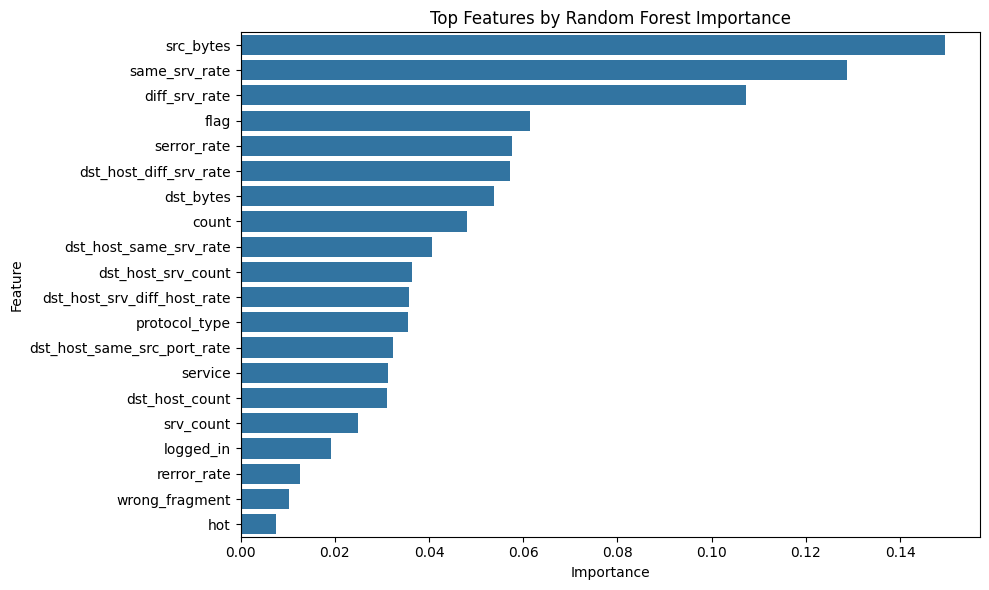

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_corr_filtered_numeric, y)
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_corr_filtered_numeric.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_rf_features = feature_importance_df.head(k)
print(f"Top {k} features by Random Forest importance:\n", top_rf_features)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_rf_features, x='Importance', y='Feature')
plt.title("Top Features by Random Forest Importance")
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# X_pca = pca.fit_transform(X_corr_filtered_numeric)

# explained = np.cumsum(pca.explained_variance_ratio_)
# print("PCA: Cumulative variance:", explained)

# plt.figure(figsize=(8, 4))
# plt.plot(range(1, 11), explained, marker='o', linestyle='--')
# plt.xlabel("Number of Principal Components")
# plt.ylabel("Cumulative Variance")
# plt.title("PCA")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
X_final_kbest = X_corr_filtered[selected_kbest_cols]

X_final_rf = X_corr_filtered[top_rf_features['Feature']]

# X_final_pca = pd.DataFrame(X_pca)

print("Final shapes:")
print("SelectKBest:", X_final_kbest.shape)
print("RandomForest:", X_final_rf.shape)
# print("PCA:", X_final_pca.shape)

Final shapes:
SelectKBest: (125973, 20)
RandomForest: (125973, 20)


In [ ]:
print(train_minmax)

        duration  protocol_type   service  flag     src_bytes     dst_bytes  \
0       0.000000            0.5  0.289855   0.9  3.558064e-07  0.000000e+00   
1       0.000000            1.0  0.637681   0.9  1.057999e-07  0.000000e+00   
2       0.000000            0.5  0.710145   0.5  0.000000e+00  0.000000e+00   
3       0.000000            0.5  0.347826   0.9  1.681203e-07  6.223962e-06   
4       0.000000            0.5  0.347826   0.9  1.442067e-07  3.206260e-07   
...          ...            ...       ...   ...           ...           ...   
125968  0.000000            0.5  0.710145   0.5  0.000000e+00  0.000000e+00   
125969  0.000186            1.0  0.710145   0.9  7.608895e-08  1.106923e-07   
125970  0.000000            0.5  0.782609   0.9  1.616709e-06  2.931438e-07   
125971  0.000000            0.5  0.434783   0.5  0.000000e+00  0.000000e+00   
125972  0.000000            0.5  0.289855   0.9  1.094232e-07  0.000000e+00   

        land  wrong_fragment  urgent  hot  ...  dst

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd
# import numpy as np

# X_train = train_minmax[selected_kbest_cols]
# y_train = train_df['attack_type']

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)

# X_test = test_minmax.reindex(columns=selected_kbest_cols, fill_value=0)

# print("Train columns:", list(X_train.columns))
# print("Test columns:", list(X_test.columns))

# print("**Training Logistic Regression")
# model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
# model.fit(X_train, y_train_encoded)

# print("Model trained successfully!\n")

# predicted_class_ids = model.predict(X_test)
# predicted_labels = label_encoder.inverse_transform(predicted_class_ids)
# print("Predicted labels:", predicted_labels)

# results_df = pd.DataFrame({
#     'Predicted_Attack_Type': predicted_labels
# })
# results_df['Verdict'] = results_df['Predicted_Attack_Type'].apply(lambda x: 'normal' if x == 'normal' else 'attack')

# print(results_df)

# # Print results
# print("Detection Results:")
# for i, row in results_df.iterrows():
#     print(f"Packet {i+1}: {row['Verdict']} - Detected as: {row['Predicted_Attack_Type']}")


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd
# import numpy as np

# X_train = train_minmax[selected_kbest_cols]
# y_train = train_df['attack_type']

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_bal)

# X_test = test_minmax.reindex(columns=selected_kbest_cols, fill_value=0)
# print("Train columns:", list(X_train.columns))
# print("Test columns:", list(X_test.columns))

# print("**Training Random Forest")
# model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
# model.fit(X_bal, y_train_encoded)

# print("Model trained successfully!\n")

# predicted_class_ids = model.predict(X_test)
# predicted_labels = label_encoder.inverse_transform(predicted_class_ids)
# print("Predicted labels:", predicted_labels)

# results_df = pd.DataFrame({
#     'Predicted_Attack_Type': predicted_labels
# })
# results_df['Verdict'] = results_df['Predicted_Attack_Type'].apply(lambda x: 'normal' if x == 'normal' else 'attack')

# print(results_df)
# # Print results
# print("Detection Results:")
# for i, row in results_df.iterrows():
#     print(f"Packet {i+1}: {row['Verdict']} - Detected as: {row['Predicted_Attack_Type']}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

X_train = train_minmax[selected_kbest_cols]
y_train = train_df['attack_type']

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

unique, counts = np.unique(y_train_encoded, return_counts=True)
class_counts = dict(zip(label_encoder.inverse_transform(unique), counts))
print("Class distribution before SMOTE:", class_counts)

min_class_count = min(counts)
safe_k = max(1, min(min_class_count - 1, 5))
sm = SMOTE(k_neighbors=safe_k, random_state=42)
X_bal, y_bal_encoded = sm.fit_resample(X_train, y_train_encoded)

print("Training Random Forest")
model = RandomForestClassifier(n_estimators=200,  max_depth=20, class_weight='balanced', random_state=42)
model.fit(X_bal, y_bal_encoded)
print("Model trained successfully!")

X_test = test_minmax.reindex(columns=selected_kbest_cols, fill_value=0)
predicted_class_ids = model.predict(X_test)
predicted_labels = label_encoder.inverse_transform(predicted_class_ids)

results_df = pd.DataFrame({
    'Predicted_Attack_Type': predicted_labels
})
results_df['Verdict'] = results_df['Predicted_Attack_Type'].apply(lambda x: 'normal' if x == 'normal' else 'attack')

print(results_df)
print("\nDetection Results:")
for i, row in results_df.iterrows():
    print(f"Packet {i+1}: {row['Verdict']} - Detected as: {row['Predicted_Attack_Type']}")


Class distribution before SMOTE: {'back': np.int64(956), 'buffer_overflow': np.int64(30), 'ftp_write': np.int64(8), 'guess_passwd': np.int64(53), 'imap': np.int64(11), 'ipsweep': np.int64(3599), 'land': np.int64(18), 'loadmodule': np.int64(9), 'multihop': np.int64(7), 'neptune': np.int64(41214), 'nmap': np.int64(1493), 'normal': np.int64(67343), 'perl': np.int64(3), 'phf': np.int64(4), 'pod': np.int64(201), 'portsweep': np.int64(2931), 'rootkit': np.int64(10), 'satan': np.int64(3633), 'smurf': np.int64(2646), 'spy': np.int64(2), 'teardrop': np.int64(892), 'warezclient': np.int64(890), 'warezmaster': np.int64(20)}
Training Random Forest
Model trained successfully!
   Predicted_Attack_Type Verdict
0                neptune  attack
1                neptune  attack
2                neptune  attack
3                neptune  attack
4                neptune  attack
5                   nmap  attack
6                 normal  normal
7                 normal  normal
8                 normal  norma

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

normal_train = train_minmax[train_df['attack_type'] == 'normal'].copy()

X_train_normal = normal_train.drop(columns=['attack_type', 'difficulty_level'], errors='ignore')

X_real_test = test_minmax[X_train_normal.columns]

input_dim = X_train_normal.shape[1]
inp = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(inp)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
out = Dense(input_dim, activation='sigmoid')(x)

autoencoder = Model(inputs=inp, outputs=out)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy']) # Added 'accuracy' metric

autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=70,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)

recon_train = autoencoder.predict(X_train_normal)
mse_train = np.mean((X_train_normal - recon_train) ** 2, axis=1)
threshold = np.percentile(mse_train, 99.9)

recon_real = autoencoder.predict(X_real_test)
mse_real = np.mean((X_real_test - recon_real) ** 2, axis=1)
anomaly_flags = (mse_real > threshold).astype(int)

results = pd.DataFrame({
    "Reconstruction_Error": mse_real,
    "Zero_Day_Flag": anomaly_flags,
    "AE_Verdict": ["attack" if f == 1 else "normal" for f in anomaly_flags]
})
results_df['AE_Verdict'] = results['AE_Verdict'].values


results_df['Final_Verdict'] = results_df.apply(
    lambda row: 'attack' if row['Predicted_Attack_Type'] != 'normal' and row['AE_Verdict'] == 'attack' else 'normal',
    axis=1
)

# results_df['Final_Verdict'] = results_df.apply(
#     lambda row: 'attack' if row['Predicted_Attack_Type'] != 'normal' else (
#         'attack' if row['AE_Verdict'] == 'attack' else 'normal'),
#     axis=1
# )

print("Real-Time Zero-Day Detection")
print(results_df)

Epoch 1/70
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1658 - loss: 0.0245 - val_accuracy: 0.8144 - val_loss: 9.1305e-04
Epoch 2/70
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7301 - loss: 8.0166e-04 - val_accuracy: 0.7948 - val_loss: 6.0895e-04
Epoch 3/70
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7521 - loss: 5.3725e-04 - val_accuracy: 0.7520 - val_loss: 3.4193e-04
Epoch 4/70
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7387 - loss: 3.1895e-04 - val_accuracy: 0.7308 - val_loss: 2.6434e-04
Epoch 5/70
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7081 - loss: 2.5101e-04 - val_accuracy: 0.7497 - val_loss: 2.4158e-04
Epoch 6/70
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7494 - loss: 2.1592e-04 - val_accuracy: 0.7302 - val_loss: 1.9582e-04
Epoch 7/70
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7220 - loss: 1.8582e-04 - val_accuracy: 0.7498 - val_loss: 1.6122e-04
Epoch 8/70
1894/1894 ━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

true_labels = results_df['AE_Verdict']
predicted_final = results_df['Final_Verdict'].tolist()

accuracy = accuracy_score(true_labels, predicted_final)
cm = confusion_matrix(true_labels, predicted_final, labels=['normal', 'attack'])
TN, FP, FN, TP = cm.ravel()
fpr = FP / (FP + TN)

print(f"\nAccuracy: {accuracy*100:.2f}%")
print(f"False Positive Rate: {fpr*100:.2f}%")
print("Confusion Matrix:\n", cm)


Accuracy: 95.45%
False Positive Rate: 0.00%
Confusion Matrix:
 [[ 9  0]
 [ 1 12]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

true_labels = results_df['AE_Verdict']
# true_labels = results_df['Predicted_Attack_Type']
pred_labels = results_df['Final_Verdict']

acc = accuracy_score(true_labels, pred_labels)
cm = confusion_matrix(true_labels, pred_labels, labels=['normal', 'attack'])

fp = cm[0][1]
tn = cm[0][0]
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

print(f"\nFinal Accuracy: {acc:.4f}")
print(f"False Positive Rate: {fpr:.4f}")
print("Confusion Matrix:\n", pd.DataFrame(cm, index=['Actual Normal', 'Actual Attack'], columns=['Pred Normal', 'Pred Attack']))


Final Accuracy: 0.9545
False Positive Rate: 0.0000
Confusion Matrix:
                Pred Normal  Pred Attack
Actual Normal            9            0
Actual Attack            1           12


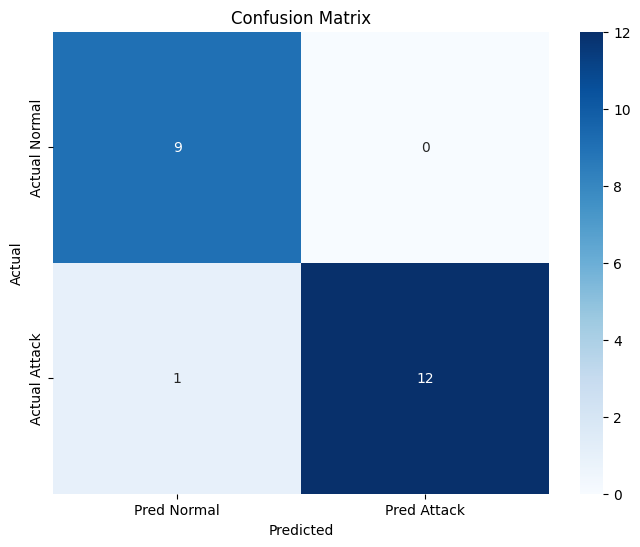

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Normal', 'Pred Attack'], yticklabels=['Actual Normal', 'Actual Attack'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:

from sklearn.metrics import classification_report

print("\nDetailed Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=['normal', 'attack']))


Detailed Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.92      0.96        13
      attack       0.90      1.00      0.95         9

    accuracy                           0.95        22
   macro avg       0.95      0.96      0.95        22
weighted avg       0.96      0.95      0.95        22



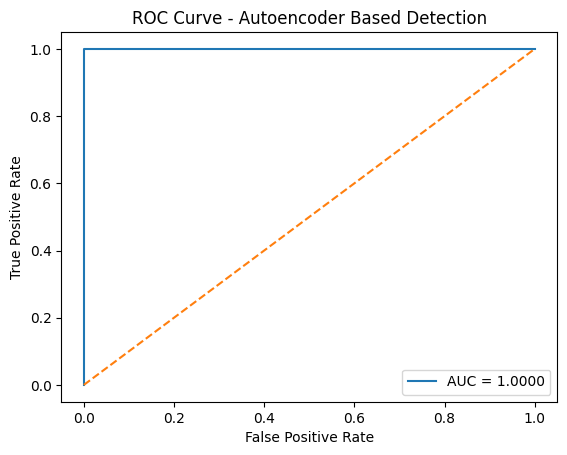

In [ ]:
from sklearn.metrics import roc_curve, auc

# Map labels to binary
y_true_binary = true_labels.map({'normal': 0, 'attack': 1})
y_pred_binary = pred_labels.map({'normal': 0, 'attack': 1})

# Use reconstruction error as a proxy for prediction probability
y_score = results['Reconstruction_Error']

fpr, tpr, _ = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.4f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Autoencoder Based Detection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

summary = pd.DataFrame([{
    'Accuracy': accuracy_score(true_labels, pred_labels),
    'Precision': precision_score(true_labels, pred_labels, pos_label='attack'),
    'Recall': recall_score(true_labels, pred_labels, pos_label='attack'),
    'F1 Score': f1_score(true_labels, pred_labels, pos_label='attack'),
    'False Positive Rate': fpr[1] if len(fpr) > 1 else None,
    'AUC Score': roc_auc
}])

print("\nDetection Performance Summary:")
display(summary)



Detection Performance Summary:


,Accuracy,Precision,Recall,F1 Score,False Positive Rate,AUC Score
0,0.954545,1.0,0.923077,0.96,0.0,1.0


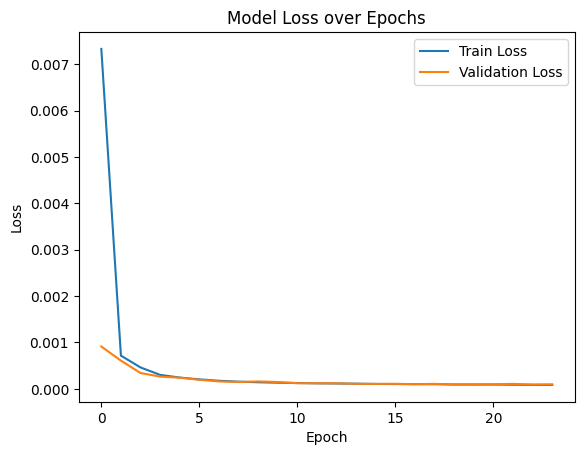

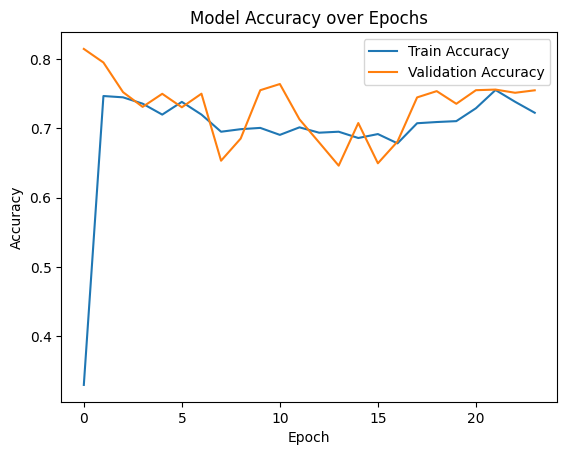

In [ ]:
# Plot accuracy and loss across epochs
plt.plot(autoencoder.history.history['loss'], label='Train Loss')
plt.plot(autoencoder.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# You can uncomment and run this cell again after the autoencoder training (cell efO99RENCj-q) is complete
# with 'accuracy' metric added to plot accuracy.
plt.plot(autoencoder.history.history['accuracy'], label='Train Accuracy')
plt.plot(autoencoder.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()